In [75]:
path_antoine = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/"
path_results_antoine = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/Results/"

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, MissingIndicator
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler

from Tool_Functions.cleaning_data import *
from Tool_Functions.join_data import *
from Tool_Functions.test_comportment_reabo import *
from Tool_Functions.visual import *
from Tool_Functions.comportment_reabo import *

In [77]:
scaler = StandardScaler()


In [78]:
new_df = file_to_dataframe(path_antoine + 'fusion_table_score_v1.csv')

In [79]:
new_df = new_df.drop(columns = [ '1', '2', '3', '4', '5', '6', '7', '8', '9',
                                '10', '11', '12', 'NOMBRE_ABONNEMENTS'])

In [80]:
new_df = new_df.drop(columns = ['Autres_n_REABOS_POURCENTAGE', 'ODD 15 jours EV+_n_REABOS_POURCENTAGE',
                                'ODD 15 jours TC_n_REABOS_POURCENTAGE', 'ODD 21 jours TC_n_REABOS_POURCENTAGE',
                                'ODD 30 jours EV+_n_REABOS_POURCENTAGE', 'ODD 30 jours TC_n_REABOS_POURCENTAGE',
                                'ODD 7 jours autre que SG_n_REABOS_POURCENTAGE',
                                'Semaine genéreuse_n_REABOS_POURCENTAGE'])

In [81]:
save_to_csv_file(new_df, path_antoine + 'data_for_klustering.csv')

True

In [82]:
data = file_to_dataframe(path_antoine + 'data_for_klustering.csv')

In [83]:
df_original = pd.DataFrame(data).set_index('ID_ABONNE')
columns_names = df_original.columns
columns_names

Index(['Autres_n_REABOS', 'ODD 15 jours EV+_n_REABOS',
       'ODD 15 jours TC_n_REABOS', 'ODD 21 jours TC_n_REABOS',
       'ODD 30 jours EV+_n_REABOS', 'ODD 30 jours TC_n_REABOS',
       'ODD 7 jours autre que SG_n_REABOS', 'PAS_ODD_n_REABOS',
       'Semaine genéreuse_n_REABOS', 'PAS_ODD_MEAN_TIME', 'MOY_DELAI',
       'NB_APPARITIONS', 'Autres_MEAN_TIME_DIFF',
       'ODD 15 jours EV+_MEAN_TIME_DIFF', 'ODD 15 jours TC_MEAN_TIME_DIFF',
       'ODD 21 jours TC_MEAN_TIME_DIFF', 'ODD 30 jours EV+_MEAN_TIME_DIFF',
       'ODD 30 jours TC_MEAN_TIME_DIFF',
       'ODD 7 jours autre que SG_MEAN_TIME_DIFF', 'PAS_ODD_MEAN_TIME_DIFF',
       'Semaine genéreuse_MEAN_TIME_DIFF', 'SCORE_FIDELITE'],
      dtype='object')

In [84]:
# Supposons que df est votre DataFrame et qu'il contient des valeurs 'inf'
# Remplacer 'inf' par NaN pour le traitement ultérieur
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [85]:
data

,ID_ABONNE,Autres_n_REABOS,ODD 15 jours EV+_n_REABOS,ODD 15 jours TC_n_REABOS,ODD 21 jours TC_n_REABOS,ODD 30 jours EV+_n_REABOS,ODD 30 jours TC_n_REABOS,ODD 7 jours autre que SG_n_REABOS,PAS_ODD_n_REABOS,Semaine genéreuse_n_REABOS,...,Autres_MEAN_TIME_DIFF,ODD 15 jours EV+_MEAN_TIME_DIFF,ODD 15 jours TC_MEAN_TIME_DIFF,ODD 21 jours TC_MEAN_TIME_DIFF,ODD 30 jours EV+_MEAN_TIME_DIFF,ODD 30 jours TC_MEAN_TIME_DIFF,ODD 7 jours autre que SG_MEAN_TIME_DIFF,PAS_ODD_MEAN_TIME_DIFF,Semaine genéreuse_MEAN_TIME_DIFF,SCORE_FIDELITE
0,50402221602,0,0,1,0,0,2,0,1,0,...,NaN,NaN,1.750000,NaN,NaN,-3.250000,NaN,4.75,NaN,0.153846
1,50402223202,0,0,8,0,0,4,0,0,17,...,NaN,NaN,0.288793,NaN,NaN,0.413793,NaN,NaN,-0.233207,0.743590
2,50402224003,0,0,3,0,0,0,0,0,4,...,NaN,NaN,0.475857,NaN,NaN,NaN,NaN,NaN,-0.357143,0.538462
3,50402230202,0,0,9,0,0,3,0,0,6,...,NaN,NaN,-0.333111,NaN,NaN,2.888889,NaN,NaN,-0.944111,0.692308
4,50402230203,0,0,11,1,0,3,0,0,5,...,NaN,NaN,0.395000,4.85,NaN,8.850000,NaN,NaN,-7.150000,0.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780791,53186931901,0,1,1,0,0,0,0,0,1,...,NaN,-0.666667,-0.666667,NaN,NaN,NaN,NaN,NaN,1.333333,0.230769
780792,53186937201,0,1,1,0,0,0,0,0,1,...,NaN,-0.666667,-0.666667,NaN,NaN,NaN,NaN,NaN,1.333333,0.230769
780793,53186971001,0,1,1,0,0,0,0,0,1,...,NaN,-0.666667,-0.666667,NaN,NaN,NaN,NaN,NaN,1.333333,0.230769
780794,53186977101,0,1,1,0,0,0,0,0,1,...,NaN,0.333333,0.333333,NaN,NaN,NaN,NaN,NaN,-0.666667,0.230769


In [86]:
# Séparer la colonne ID_ABONNE
df_id = data[['ID_ABONNE']].copy()

# Séparer les données à normaliser (sans la colonne ID_ABONNE)
df_to_scale = data.drop(columns=['ID_ABONNE'])


In [87]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df_to_scale.columns)

In [88]:
df_scaled

,Autres_n_REABOS,ODD 15 jours EV+_n_REABOS,ODD 15 jours TC_n_REABOS,ODD 21 jours TC_n_REABOS,ODD 30 jours EV+_n_REABOS,ODD 30 jours TC_n_REABOS,ODD 7 jours autre que SG_n_REABOS,PAS_ODD_n_REABOS,Semaine genéreuse_n_REABOS,PAS_ODD_MEAN_TIME,...,Autres_MEAN_TIME_DIFF,ODD 15 jours EV+_MEAN_TIME_DIFF,ODD 15 jours TC_MEAN_TIME_DIFF,ODD 21 jours TC_MEAN_TIME_DIFF,ODD 30 jours EV+_MEAN_TIME_DIFF,ODD 30 jours TC_MEAN_TIME_DIFF,ODD 7 jours autre que SG_MEAN_TIME_DIFF,PAS_ODD_MEAN_TIME_DIFF,Semaine genéreuse_MEAN_TIME_DIFF,SCORE_FIDELITE
0,-0.272148,-0.558838,-1.296375,-0.601578,-0.686827,1.735324,-0.264239,1.435386,-0.986791,-0.379322,...,NaN,NaN,0.329647,NaN,NaN,-0.160732,NaN,0.356638,NaN,-1.541536
1,-0.272148,-0.558838,0.858677,-0.601578,-0.686827,3.939726,-0.264239,-0.597635,2.163984,NaN,...,NaN,NaN,0.295960,NaN,NaN,-0.104491,NaN,NaN,0.460219,1.551057
2,-0.272148,-0.558838,-0.680646,-0.601578,-0.686827,-0.469079,-0.264239,-0.597635,-0.245432,NaN,...,NaN,NaN,0.300273,NaN,NaN,NaN,NaN,NaN,0.456777,0.475372
3,-0.272148,-0.558838,1.166541,-0.601578,-0.686827,2.837525,-0.264239,-0.597635,0.125247,NaN,...,NaN,NaN,0.281623,NaN,NaN,-0.066498,NaN,NaN,0.440475,1.282136
4,-0.272148,-0.558838,1.782270,0.744330,-0.686827,2.837525,-0.264239,-0.597635,-0.060093,NaN,...,NaN,NaN,0.298409,-1.031155,NaN,0.025007,NaN,NaN,0.268118,1.685517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780791,-0.272148,1.420271,-1.296375,-0.601578,-0.686827,-0.469079,-0.264239,-0.597635,-0.801451,NaN,...,NaN,0.125513,0.273933,NaN,NaN,NaN,NaN,NaN,0.503727,-1.138154
780792,-0.272148,1.420271,-1.296375,-0.601578,-0.686827,-0.469079,-0.264239,-0.597635,-0.801451,NaN,...,NaN,0.125513,0.273933,NaN,NaN,NaN,NaN,NaN,0.503727,-1.138154
780793,-0.272148,1.420271,-1.296375,-0.601578,-0.686827,-0.469079,-0.264239,-0.597635,-0.801451,NaN,...,NaN,0.125513,0.273933,NaN,NaN,NaN,NaN,NaN,0.503727,-1.138154
780794,-0.272148,1.420271,-1.296375,-0.601578,-0.686827,-0.469079,-0.264239,-0.597635,-0.801451,NaN,...,NaN,0.147084,0.296987,NaN,NaN,NaN,NaN,NaN,0.448181,-1.138154


In [89]:
missing_indicator = MissingIndicator(features='missing-only', error_on_new=True, sparse=False)

In [90]:
feature_union = FeatureUnion(transformer_list=[
    ('missing_indicator', missing_indicator)
])

In [91]:
pipeline = Pipeline(steps=[('feature_union', feature_union),
    ('pca', PCA(n_components=2))])

In [92]:
data_pca = pipeline.fit_transform(df_scaled)

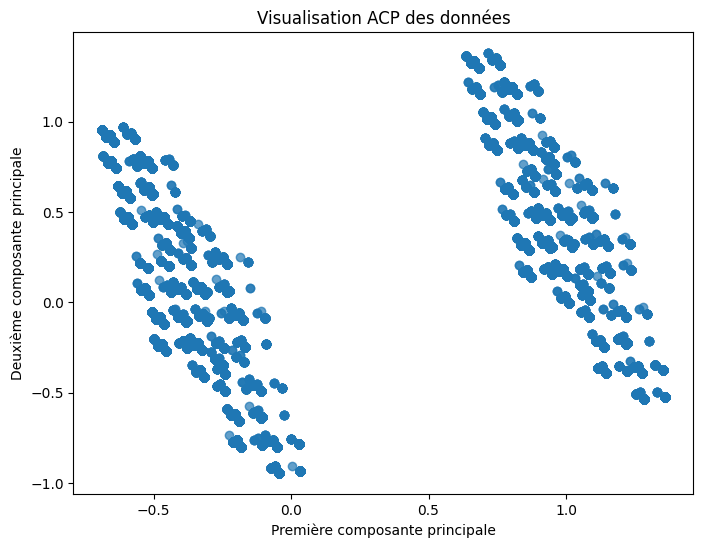

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.7)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Visualisation ACP des données')
plt.show()

In [94]:
data = data.drop('ID_ABONNE', axis=1)

In [95]:
# Initialiser un imputeur avec un indicateur de valeurs manquantes
imputer = SimpleImputer(strategy='constant', fill_value=0)
missing_indicator = MissingIndicator(features='missing-only', error_on_new=False, sparse=False)

# Unir l'imputeur et l'indicateur de manquant dans une même transformation
imputer_with_indicator = FeatureUnion(transformer_list=[
    ('imputer', imputer),
    ('missing_indicator', missing_indicator)
])

# Appliquer la transformation
data_imputed = imputer_with_indicator.fit_transform(data)


In [96]:
scaler2 = MinMaxScaler()

In [97]:
pca = PCA(n_components=2)  # Réduction à 2 dimensions pour la visualisation
df_pca = pca.fit_transform(df_scaled)

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Visualisation ACP des données')
plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

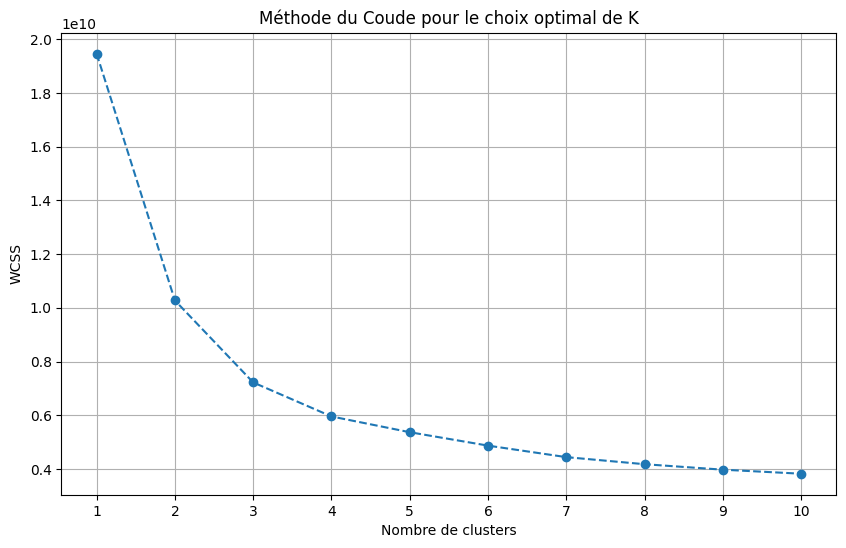

In [98]:
wcss = []
for i in range(1, 11):  # Test de 1 à 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_imputed)
    wcss.append(kmeans.inertia_)

# Affichage de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Méthode du Coude pour le choix optimal de K')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [99]:
np.random.seed(42)
sample = data_imputed
silhouette_scores = []

for k in range(2, 11):  # Testez des valeurs de k de 2 à 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sample)
    score = silhouette_score(sample, kmeans.labels_)
    silhouette_scores.append(score)
    print('Score calculé pour k =', k)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette KMeans')
plt.title('Score de silhouette pour différents nombres de clusters')
plt.show()

/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

In [ ]:
# Créer le pipeline KMeans avec normalisation
kmeans_pipeline = make_pipeline(scaler2, KMeans(n_clusters=5, random_state=42))

# Effectuer le clustering
kmeans_pipeline.fit(data_imputed)

In [ ]:
data = pd.concat([df_id, data], axis=1)

In [ ]:
cluster_labels = kmeans_pipeline.named_steps['kmeans'].labels_

# Ajouter les étiquettes de cluster au dataframe original pour analyse
data['Cluster'] = cluster_labels

# Afficher les premiers ID d'abonnés avec leurs étiquettes de cluster pour analyse
data[['ID_ABONNE', 'Cluster']].head()

Hyperparamètres : 
init : Méthode d'initialisation des centroïdes. Les options courantes sont 'k-means++' (défaut), 'random', un tableau donné de formes (n_clusters, n_features) ou une méthode d'initialisation personnalisée. 'k-means++' choisit les centroïdes initiaux pour le clustering k-means d'une manière qui accélère la convergence.

n_init : Nombre de fois où l'algorithme k-means sera exécuté avec différentes graines de centroïde. Les résultats finaux seront la meilleure sortie de n_init exécutions consécutives en termes d'inertie.

max_iter : Le nombre maximal d'itérations de l'algorithme k-means pour une seule exécution.
tol : Tolérance pour déclarer la convergence. Si les changements dans les centroïdes sont inférieurs à cette tolérance, l'algorithme peut arrêter plus tôt.

precompute_distances : Détermine si les distances entre les points doivent être précalculées ou calculées à la volée. Cela peut accélérer les choses mais peut aussi consommer beaucoup de mémoire pour les grands ensembles de données.
verbose : Mode verbeux.

random_state : Graine utilisée par le générateur de nombres aléatoires pour l'initialisation du centroïde ou si init est une graine pour l'algorithme k-means++.

copy_x : Si True (par défaut), les données d'entrée sont copiées, sinon elles peuvent être écrasées pendant le clustering.

algorithm : Choix de l'algorithme pour calculer les k-moyens parmi 'auto', 'full' ou 'elkan'. Le choix classique 'full' est l'algorithme EM pour le k-means. 'elkan' est une variante plus efficace qui est plus rapide sur les ensembles de données avec de nombreux clusters mais qui ne fonctionne pas avec des métriques autres que la distance euclidienne.

In [ ]:
compte = data.groupby('Cluster').count()
compte


In [ ]:

centroids = kmeans.cluster_centers_
centroids
# Convertir les centroïdes en DataFrame pour une meilleure lisibilité
centroids_df = pd.DataFrame(centroids)
# Afficher les centroïdes
print(centroids_df)
save_to_csv_file(centroids_df, path_antoine + 'centres_clusters.csv')


In [ ]:
df_scaled_df = pd.DataFrame(df_scaled, columns=columns_names)
df_scaled_df['Cluster_KMeans'] = kmeans.labels_
k = 7
for i in range(k):
    print(f"Cluster {i} characteristics:")
    cluster_data = df_scaled_df[df_scaled_df['Cluster_KMeans'] == i]
    # Vous pouvez ici calculer des statistiques ou des graphiques pour comprendre chaque cluster
    print(cluster_data.describe())  # Résumé statistique
    save_to_csv_file(cluster_data.describe(), path_antoine + 'cluster_data.csv')